# 1D convolutions

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg
from scipy import signal
from scipy import linalg
import time

Consider the square wave discrete signal:

$$ \mathbf{v}_i=
\begin{cases}
0, & i = 1,\dots, 50 \\
1, & i = 51,\dots, 75 \\
0, & i = 76,\dots, 100 \\
\end{cases}
$$

Define the vector $\mathbf{v}$ and plot the corresponding signal.

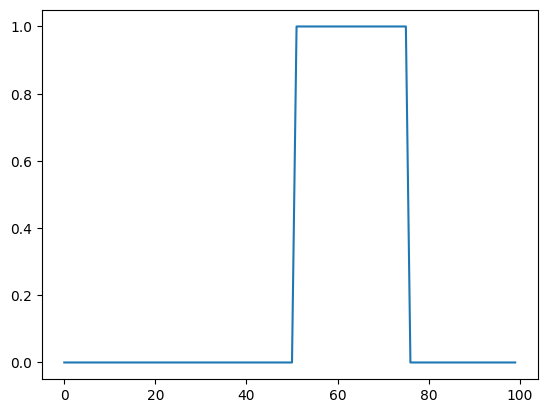

In [66]:
v = np.zeros(100)
v[51:76] = 1
plt.plot(v)

Consider the following kernels $\mathbf{k}$:

/var/folders/_v/q6j8tl0d2cb93y5h0_d24pgr0000gn/T/ipykernel_8466/498271783.py:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_k = signal.gaussian(20, std=3)


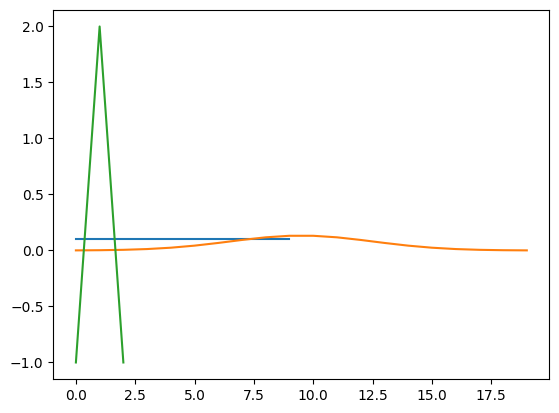

In [67]:
### first kernel
uni_k = np.ones(10)/10

### second kernel
gauss_k = signal.gaussian(20, std=3)
gauss_k = gauss_k / np.sum(gauss_k)

### third kernel
laplace_k = np.array([-1,2,-1])

plt.plot(uni_k)
plt.plot(gauss_k)
plt.plot(laplace_k)

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

In [68]:
# queste convolution vanno fatte con vettori della stessa dimensione --> prima di tutto fai zero-padding sui kernel

uni_l = list(uni_k)
for _ in range(len(v) - len(uni_k)):
    uni_l.append(0)
uni_k = np.array(uni_l)

gauss_l = list(gauss_k)
for _ in range(len(v) - len(gauss_k)):
    gauss_l.append(0)
gauss_k = np.array(gauss_l)

laplace_l = list(laplace_k)
for _ in range(len(v) - len(laplace_k)):
    laplace_l.append(0)
laplace_k = np.array(laplace_l)

## 1. Toeplitz matrix

Define a Toeplitz matrix $K$ associated with the kernel $\mathbf{k}$.
Then, compute the convolution between $\mathbf{k}$ and $\mathbf{v}$, exploiting the property:

$\mathbf{k} * \mathbf{v} = K \mathbf{v}$

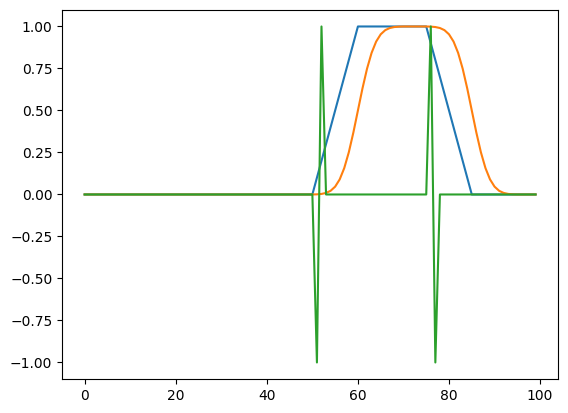

In [69]:
top = scipy.linalg.toeplitz(uni_k, np.zeros(len(v))) # kernel on col and signal on row
conv_uni = top @ v
plt.plot(conv_uni)

top = scipy.linalg.toeplitz(gauss_k, np.zeros(len(v)))
conv_uni = top @ v
plt.plot(conv_uni)

top = scipy.linalg.toeplitz(laplace_k, np.zeros(len(v)))
conv_uni = top @ v
plt.plot(conv_uni)

# for this approach the padding is not necessary

## 2. Direct definition (sums of products)

The convolution without "boundary layer" (i.e. the part of the vector which is identical between the standard and the circular convolutions), is given by:

$(\mathbf{k} * \mathbf{v})_i = \sum_{j = 0}^{n_k - 1} \mathbf{k}_{n_k - j} \mathbf{v}_{i + j}$

for $i = 1, \dots, n_v - n_k + 1$.

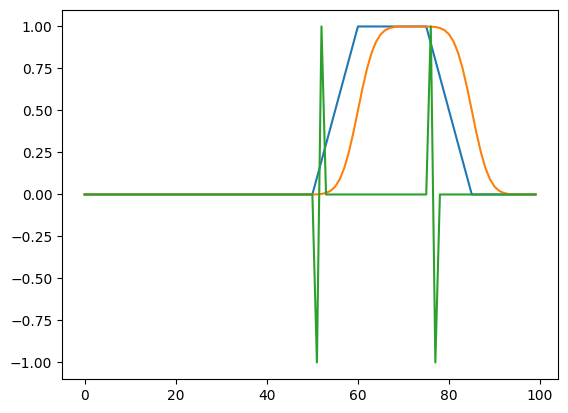

In [70]:
def convolve_signal(v1, v2):
    conv = np.zeros(len(v1))
    for l in range(len(v1)):
        for i in range(len(v2)):
            conv[l] += v1[l - i] * v2[i]
    return conv

plt.plot(convolve_signal(uni_k, v))
plt.plot(convolve_signal(gauss_k, v))
plt.plot(convolve_signal(laplace_k, v))

## 3. Convolution through DFT

When the two signals have the same size, we have:

$ \widehat{\mathbf{v} \circledast \mathbf{k}} = \widehat{\mathbf{v}} \odot \widehat{\mathbf{k}} $

Where:
- $\hat{\mathbf{a}}$ is the DFT of the signal $\mathbf{a}$
- $\circledast$ is the circular convolution
- $\odot$ is the Hadamard product

When the two signals do not have the same size, the above formula can be applied simply by "zero-padding" the shorter signal (N.B: this is automatically done by the `numpy.fft.fft` command by passing the required length as second argument).

Besides the filtered signal, plot the DFT of the two signals and of their convolution.


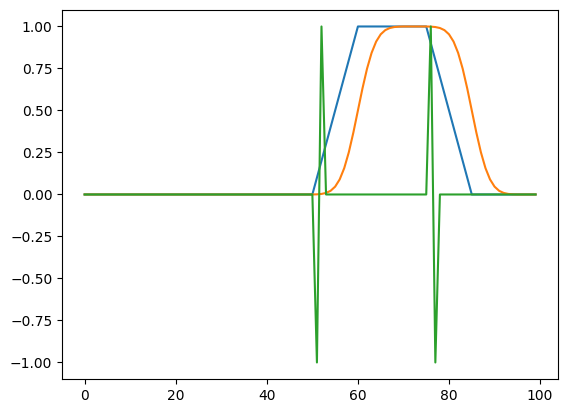

In [71]:
v_f = np.fft.fft(v)
uni_f = np.fft.fft(uni_k)
gauss_f = np.fft.fft(gauss_k)
laplace_f = np.fft.fft(laplace_k)

conv1 = np.real(np.fft.ifft(v_f * uni_f))
conv2 = np.real(np.fft.ifft(v_f * gauss_f))
conv3 = np.real(np.fft.ifft(v_f * laplace_f))

plt.plot(conv1)
plt.plot(conv2)
plt.plot(conv3)

## 4. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

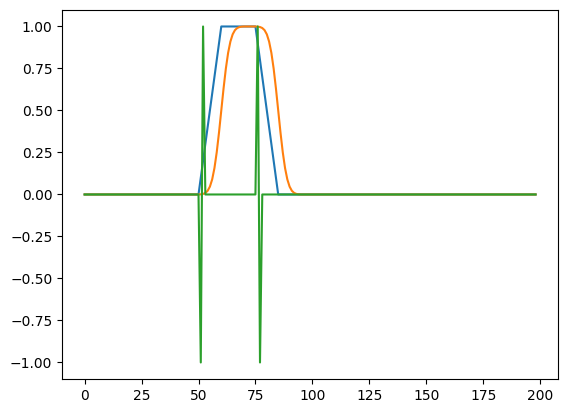

In [75]:
conv1 = scipy.signal.convolve(v, uni_k)
conv2 = scipy.signal.convolve(v, gauss_k)
conv3 = scipy.signal.convolve(v, laplace_k)

plt.plot(conv1)
plt.plot(conv2)
plt.plot(conv3)

In [65]:
# those are the main methods for computing the convolutions between signals --> the most efficient is DFT
# deep CNN discard the convolution part generated by the padding section of the signals
# this is easy to understand with intuition, but the main application of convolution are in 2 dimensions